# Creating RADAR Graphs

## Creating dataframe

In [4]:
# Import pandas library
import pandas as pd

# initialize list of lists
data = [['Software',3,3,2,2,3,3]]
 
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Metric', 'SQL','Tableau','Python','PowerBI','SAS','Excel'])

# print dataframe.
df

,Metric,SQL,Tableau,Python,PowerBI,SAS,Excel
0,Software,3,3,2,2,3,3


## Creating Graphs

In [5]:
# import Libraries
import matplotlib.pyplot as plt
from math import pi
 

In [6]:

# Count the number of variables to be displayed
categories=list(df)[1:]
N = len(categories)

#define the values to be plotted by dropping the row name and retaining the numerical variables
values=df.loc[0].drop('Metric').values.flatten().tolist()
#then repeat the first value at the end of the list. This 'closes' the graph, making a complete shape
values += values[:1]
values
 

[3, 3, 2, 2, 3, 3, 3]

In [7]:

#Define the angle of each line in the plot, dependent on the number of categories
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 

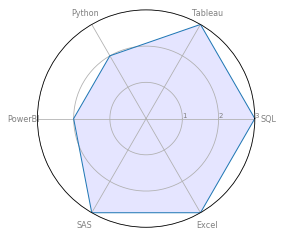

In [9]:
# Initialise the radar graph
ax = plt.subplot(111, polar=True)

# Plot an axe for each of the categories
plt.xticks(angles[:-1], categories, color='grey', size=8)

# Add ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3], ["1","2","3"], color="grey", size=7)
plt.ylim(0,3)
 
# Add data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

# Show the graph
plt.show()

### Making a function to plot them all

In [24]:
def radar_graph(row, title, color):

    # Count the number of variables to be displayed
    categories=list(df)[1:]
    N = len(categories)

    #define the values to be plotted by dropping the row name and retaining the numerical variables
    values=df.loc[row].drop('Category').values.flatten().tolist()
    #then repeat the first value at the end of the list. This 'closes' the graph, making a complete shape
    values += values[:1]
    values

    #Define the angle of each line in the plot, dependent on the number of categories
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the radar graph
    ax = plt.subplot(111, polar=True)

    # Plot an axe for each of the categories
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Add ylabels
    ax.set_rlabel_position(0)
    plt.yticks([1,2,3], ["1","2","3"], color="grey", size=7)
    plt.ylim(0,3)

    # Add data
    ax.plot(angles, values, linewidth=1, linestyle='solid', color=color)

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.3, color=color)
    
    # Add a title
    plt.title(title, size=18, color="black", y=1.05)

    # Show the graph
    plt.show()

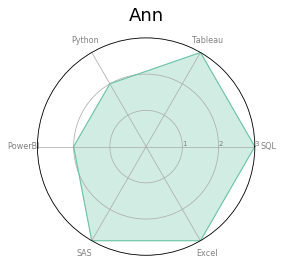

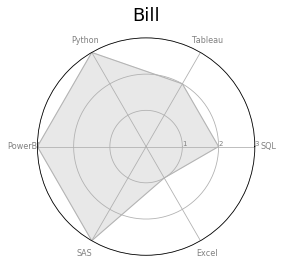

In [25]:
# update dataframe to include two people and their skill scores
data = [['Ann',3,3,2,2,3,3],['Bill',2,2,3,3,3,1]]
df = pd.DataFrame(data, columns = ['Category', 'SQL','Tableau','Python','PowerBI','SAS','Excel'])

# define a colour palette:
colors = plt.cm.get_cmap("Set2", len(df.index))

# Loop to plot
for row in range(0, len(df.index)):
    radar_graph( row=row, title=df['Category'][row], color=colors(row))
    